# Create a linear least squares model

In this basic example we are going to create a global approximation of a model response using  a linear
function:

   $$ \underline{y} \, \approx \, \widehat{h}(\underline{x}) \,
                      = \, \sum_{j=0}^{n_X} \; a_j \; \psi_j(\underline{x})$$
                      
                      
Here

$$h(x) = [cos(x_1 + x_2), (x2 + 1)* e^{x_1 - 2* x_2}]$$

In [2]:
from __future__ import print_function
import openturns as ot

# Prepare an input sample
x  = [[0.5,0.5], [-0.5,-0.5], [-0.5,0.5], [0.5,-0.5]]
x += [[0.25,0.25], [-0.25,-0.25], [-0.25,0.25], [0.25,-0.25]]

In [3]:
# Compute the output sample from the input sample and a function
formulas = ['cos(x1 + x2)', '(x2 + 1) * exp(x1 - 2 * x2)']
model = ot.SymbolicFunction(['x1', 'x2'], formulas)
y = model(x)

In [4]:
# create a linear least squares model
algo = ot.LinearLeastSquares(x, y)
algo.run()

In [5]:
# get the linear term
algo.getLinear()

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[-2.97904e-16,-1.98603e-16,0.998189,-0.925648]

In [6]:
# get the constant term
algo.getConstant()

class=Point name=Unnamed dimension=2 values=[0.854471,1.05305]

In [7]:
# get the metamodel
responseSurface = algo.getMetaModel()

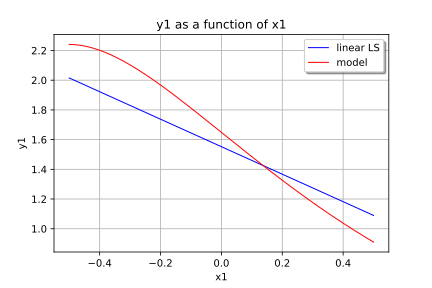

In [8]:
# plot 2nd output of our model with x1=0.5
graph = ot.ParametricFunction(responseSurface, [0], [0.5]).getMarginal(1).draw(-0.5, 0.5)
graph.setLegends(['linear LS'])
curve = ot.ParametricFunction(model, [0], [0.5]).getMarginal(1).draw(-0.5, 0.5).getDrawable(0)
curve.setColor('red')
curve.setLegend('model')
graph.add(curve)
graph.setLegendPosition('topright')
graph